# Networkx and Altair

In [14]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa

## Create a random network

Let's just create a random network.

In [15]:
# Generate a random graph and compute node positions
G = nx.fast_gnp_random_graph(n = 30, p = 0.25)
pos = nx.spring_layout(G)

# Add random attributes to nodes and edges
nx.set_node_attributes(G, {n: dict(weight = np.random.randn(), name = np.random.randint(1000), viable = np.random.choice(['yes', 'no'])) for n in G.nodes})
nx.set_edge_attributes(G, {e: dict(weight = np.random.uniform(1, 10)) for e in G.edges})

## Drawing the graph.

Let's draw the graph using NetworkX.


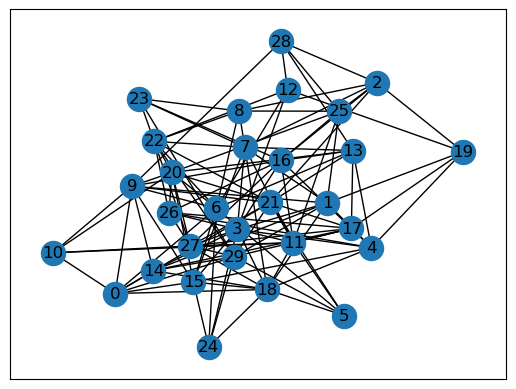

In [16]:
nx.draw_networkx(G = G, pos = pos)

In [24]:
nxa.draw_networkx(G = G, pos = pos, node_label = 'node') # .properties(title = 'Example Graph', width = 1000, height = 500)

alt.LayerChart(...)

In [25]:
nxa.draw_networkx(G = G, pos = pos, node_tooltip = ['node', 'name', 'weight', 'viable']).interactive()

alt.LayerChart(...)

# Leveraging Altair

In [26]:
chart = nxa.draw_networkx(G = G, pos = pos,
    node_size = 200, node_colour = 'viable', node_cmap = 'viridis', node_tooltip = ['weight', 'name', 'viable'],
    edge_width = 'weight'
)

Let's add some advanced exploration features using Altair.

In [32]:
# Get the node layer
edges = chart.layer[0]
nodes = chart.layer[1]

# Build a brush
brush = alt.selection_interval(encodings = ['x', 'y'])
colour = alt.Color('viable:N', legend = None)

# Condition nodes based on brush
nodes = nodes.encode(
    fill = alt.condition(brush, colour, alt.value('gray')),
).add_params(
    brush
)

# Create a bar graph to show highlighted nodes.
bars = alt.Chart(nodes.data).mark_bar().encode(
    x = alt.X('count()', scale = alt.Scale(domain = (0, 20))),
    y = 'viable',
    color = 'viable',
).transform_filter(
    brush
)

alt.vconcat(edges + nodes, bars)

alt.VConcatChart(...)